<a href="https://colab.research.google.com/github/VictorCastroDeFaria/MinicursoIntroducaoAoAM/blob/main/minicursoAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Minicurso introdução ao Machine Learning

#### Este Notebook mantém consigo as anotações do minicurso ministrado no dia 22 de Novembro de 2022 e alguns códigos utilizados para ilustrar e explicar conceitos discutidos durante o minicurso.

### Importação de bibliotecas e da base de dados usada

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

data_wine = load_wine() # Retorna como dicionário de arrays
features = data_wine.feature_names
X_data_wine = pd.DataFrame(data_wine.data,columns = features)
y_data_wine = pd.DataFrame(data_wine.target,columns = ['target'])

In [ ]:
#data_wine_features.columns = features
X_data_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
X_data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
X_data_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


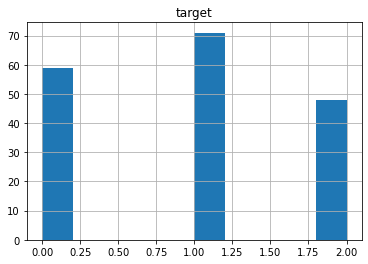

In [ ]:
y_data_wine.head(), y_data_wine.hist();

In [ ]:
y_data_wine['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

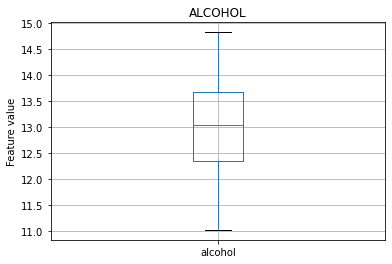

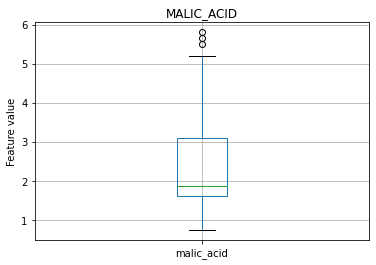

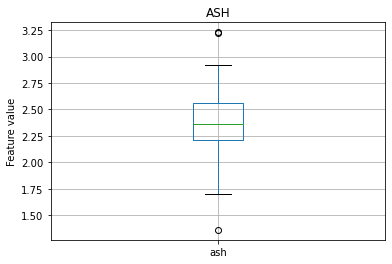

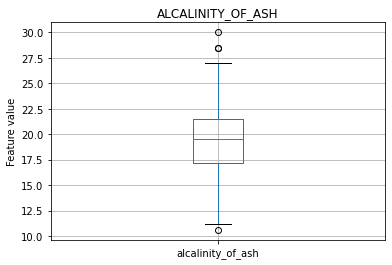

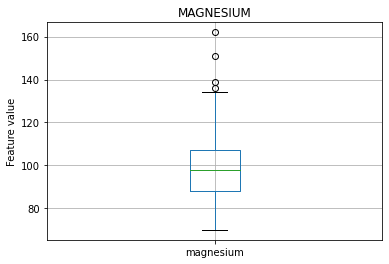

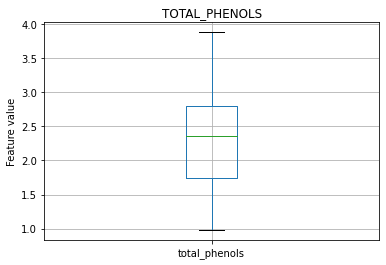

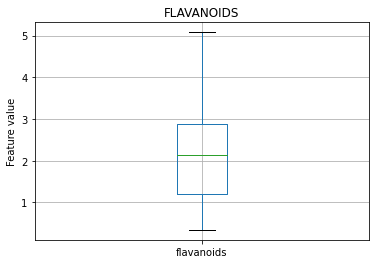

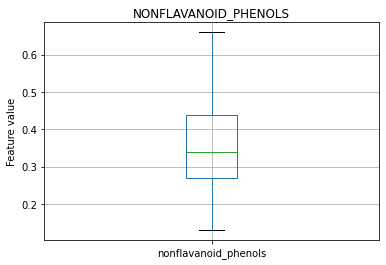

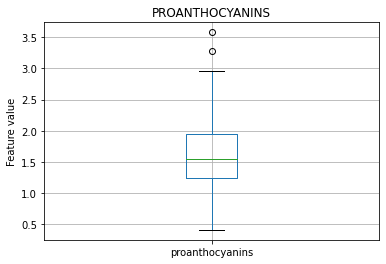

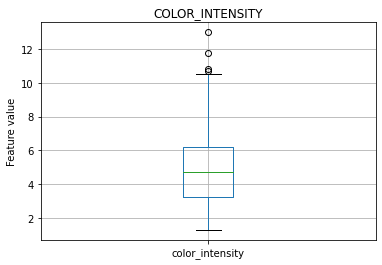

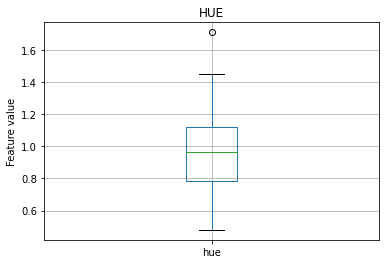

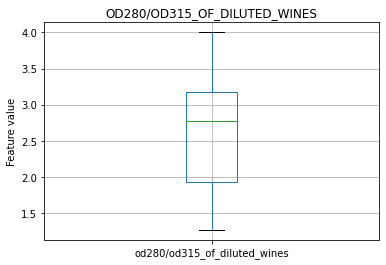

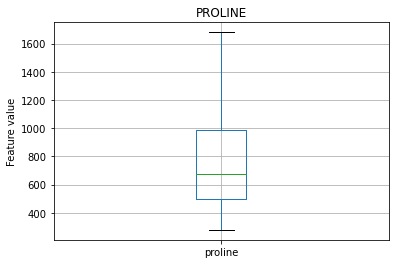

In [ ]:
for feature in X_data_wine:
    X_data_wine.boxplot(column = feature, grid = True)
    plt.title(feature.upper())
    plt.ylabel("Feature value")
    # Você pode usar também a função do Pandas x_data.plot(kind='box')
    plt.show()

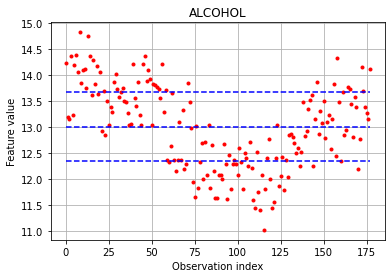

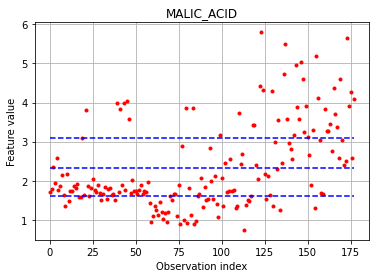

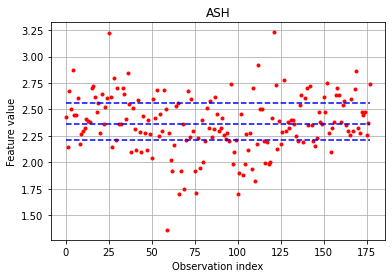

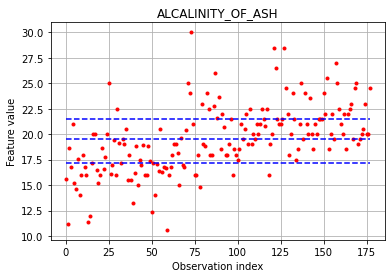

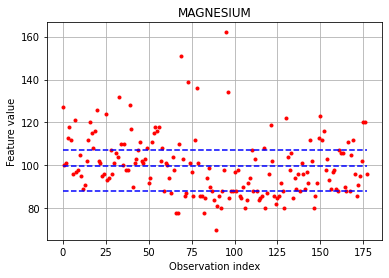

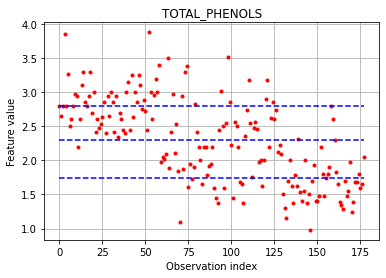

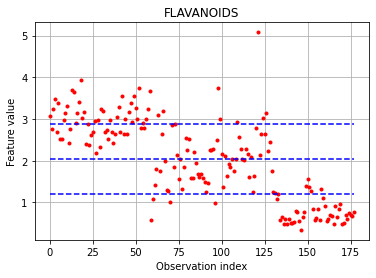

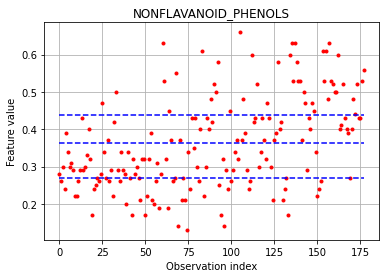

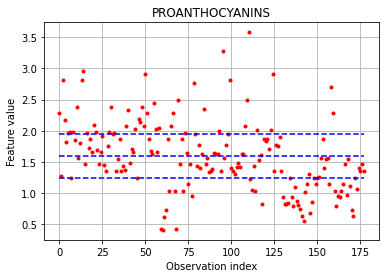

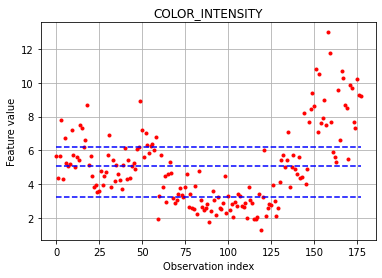

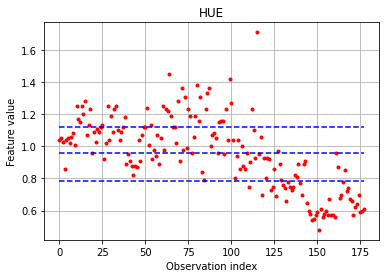

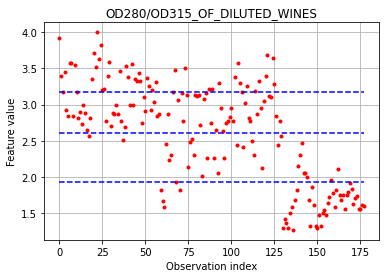

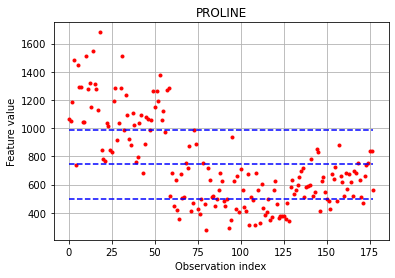

In [ ]:
for feature in X_data_wine:
    plt.plot(X_data_wine[feature],'r.')
    
    # Plotando o valor médio da série de observações 
    feature_mean = np.mean(X_data_wine[feature])
    mean_series = [feature_mean for observation in X_data_wine[feature]]
    plt.plot(mean_series,'b--')
    
    # Encontrando os primeiros e terceiros quartis de cada atributo
    feature_Q1 = np.quantile(X_data_wine[feature], 0.25)
    Q1_series = [feature_Q1 for observation in X_data_wine[feature]]
    plt.plot(Q1_series,'b--')
    feature_Q3 = np.quantile(X_data_wine[feature], 0.75)
    Q3_series = [feature_Q3 for observation in X_data_wine[feature]]
    plt.plot(Q3_series,'b--')
    
    plt.xlabel("Observation index")
    plt.ylabel("Feature value")
    plt.title(feature.upper())
    plt.grid()
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler.fit_transform(X_data_wine)

x_scaled = pd.DataFrame(x_scaled, columns = X_data_wine.columns)
x_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [ ]:
x_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_standardized = scaler.fit_transform(X_data_wine)

x_standardized = pd.DataFrame(x_standardized, columns = X_data_wine.columns)
x_standardized.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
x_standardized.describe().round(decimals = 3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003
min,-2.434,-1.433,-3.679,-2.671,-2.088,-2.107,-1.696,-1.868,-2.069,-1.634,-2.095,-1.895,-1.493
25%,-0.788,-0.659,-0.572,-0.689,-0.824,-0.885,-0.828,-0.740,-0.597,-0.795,-0.768,-0.952,-0.785
50%,0.061,-0.423,-0.024,0.002,-0.122,0.096,0.106,-0.176,-0.063,-0.159,0.033,0.238,-0.234
75%,0.836,0.670,0.698,0.602,0.510,0.809,0.849,0.610,0.629,0.494,0.713,0.789,0.758
max,2.260,3.109,3.156,3.155,4.371,2.540,3.063,2.402,3.485,3.435,3.302,1.961,2.971


### Exemplo ilustrativo de como funciona transformação de dados para uma elipse

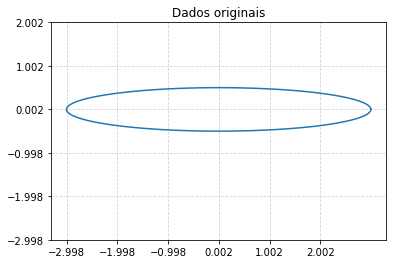

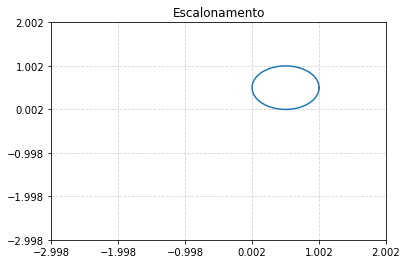

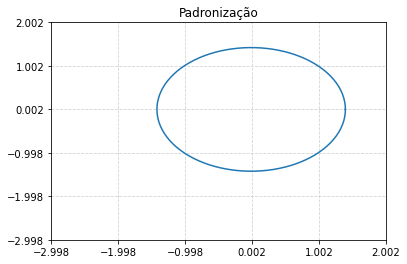

In [ ]:
from math import pi

u=0     #x-position of the center
v=0    #y-position of the center
a=3.     #radius on the x-axis
b=0.5    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
X_ellipse = u+a*np.cos(t)
y_ellipse = v+b*np.sin(t)


plt.plot(X_ellipse, y_ellipse)
min_tick = np.min([np.min(X_ellipse),np.min(y_ellipse)])
max_tick = np.max([np.max(X_ellipse),np.max(y_ellipse)])
plt.xticks(np.arange(min_tick, max_tick, step=1))
plt.yticks(np.arange(min_tick, max_tick, step=1))
plt.title("Dados originais")
plt.grid(color='lightgray',linestyle='--')
plt.show()

ellipse_dict = {'X_e':X_ellipse, 'y_e':y_ellipse}
ellipse_df = pd.DataFrame(ellipse_dict)
#display(ellipse_df.head())

# Escalonamento dos dados 

scaler = MinMaxScaler(feature_range=(0, 1))
el_scaled = scaler.fit_transform(ellipse_df)

el_scaled = pd.DataFrame(el_scaled, columns = ellipse_df.columns)

plt.plot(el_scaled['X_e'], el_scaled['y_e'])
min_tick = np.min([np.min(X_ellipse),np.min(y_ellipse)])
max_tick = np.max([np.max(X_ellipse),np.max(y_ellipse)])
plt.xticks(np.arange(min_tick, max_tick, step=1))
plt.yticks(np.arange(min_tick, max_tick, step=1))
plt.title("Escalonamento")
plt.grid(color='lightgray',linestyle='--')
plt.show()

# Padronização dos dados

scaler = StandardScaler()
el_standardized = scaler.fit_transform(ellipse_df)

el_standardized = pd.DataFrame(el_standardized, columns = ellipse_df.columns)
el_standardized.head()

plt.plot(el_standardized['X_e'], el_standardized['y_e'])
min_tick = np.min([np.min(X_ellipse),np.min(y_ellipse)])
max_tick = np.max([np.max(X_ellipse),np.max(y_ellipse)])
plt.xticks(np.arange(min_tick, max_tick, step=1))
plt.yticks(np.arange(min_tick, max_tick, step=1))
plt.title("Padronização")
plt.grid(color='lightgray',linestyle='--')
plt.show()



### Aplicação de modelos de aprendizado, com hiperparâmetros e recursos arbitrários 

In [ ]:
# Primeiramente, façamos uma separação entre treinamento e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data_wine, 
                                                    y_data_wine, 
                                                    test_size = 0.1, 
                                                    random_state = 1)

y_test, y_train = y_test.values.ravel(), y_train.values.ravel()

Coeficiente angular: [[0.99]]  e coeficiente linear:  [-0.1317]


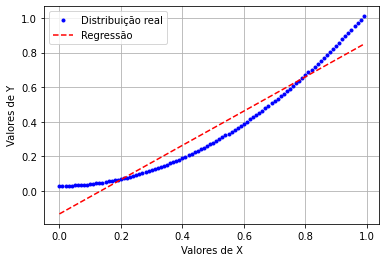

Coeficiente angular: [[1.]]  e coeficiente linear:  [0.03]


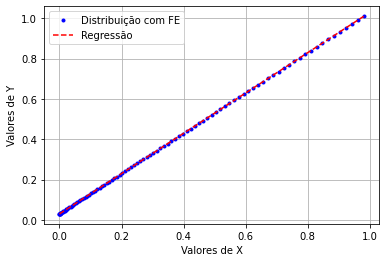

In [ ]:
# Regressão linear - para simplicidade, apenas um modelo bidimensional é tratado aqui:
# Como a base de dados usada é uma base de classificação, vamos lidar com dados artificiais

from sklearn import linear_model
reg = linear_model.LinearRegression()
X_reg = np.arange(0, 1, 0.01).reshape(-1,1)
y_reg = X_reg**2 + 0.03
y_reg.reshape(-1,1)
reg.fit(X_reg, y_reg)

print("Coeficiente angular:",reg.coef_,' e coeficiente linear: ', reg.intercept_)

plt.plot(X_reg,y_reg,'b.')
plt.plot(X_reg, reg.predict(X_reg),'r--')
plt.grid()
plt.xlabel("Valores de X")
plt.ylabel("Valores de Y")
plt.legend(['Distribuição real','Regressão'])
plt.show()

X_reg_sqrd = X_reg**2
reg.fit(X_reg_sqrd, y_reg)

print("Coeficiente angular:",reg.coef_,' e coeficiente linear: ', reg.intercept_)

plt.plot(X_reg_sqrd,y_reg,'b.')
plt.plot(X_reg_sqrd, reg.predict(X_reg_sqrd),'r--')
plt.grid()
plt.xlabel("Valores de X")
plt.ylabel("Valores de Y")
plt.legend(['Distribuição com FE','Regressão'])
plt.show()

Coeficiente angular: [[8.01083944]]  e coeficiente linear:  [-5.0649404]


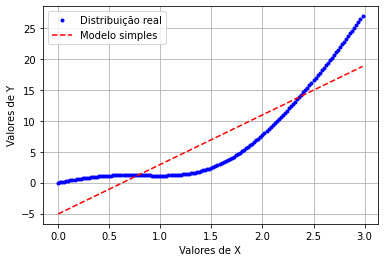

Coeficientes angulares: [[ 0.         -0.48730219 -0.64527386  1.30097997]]  e coeficiente linear:  [0.84888011]


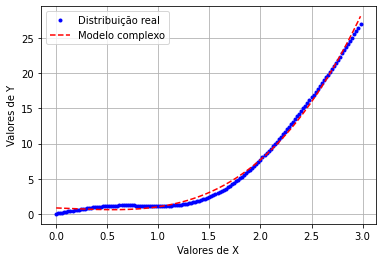

Coeficientes angulares: [[ 0.         -7.39607828  5.17010662]]  e coeficiente linear:  [2.53580568]


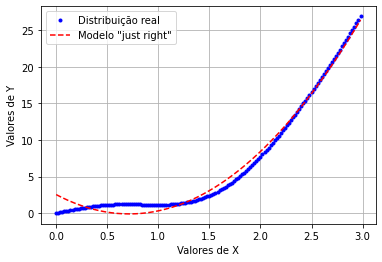

In [ ]:
# Regressão linear para avaliar underfitting e overfitting:
# Importante ressaltar que os exemplos aqui expostos são apenas ilustrativos

from sklearn import linear_model
reg = linear_model.LinearRegression()
X_reg = np.arange(0, 3, 0.02).reshape(-1,1)
y_reg = X_reg**3 + np.sin(3*X_reg)
y_reg.reshape(-1,1)
reg.fit(X_reg, y_reg)

print("Coeficiente angular:",reg.coef_,' e coeficiente linear: ', reg.intercept_)

plt.plot(X_reg,y_reg,'b.')
plt.plot(X_reg, reg.predict(X_reg),'r--')
plt.grid()
plt.xlabel("Valores de X")
plt.ylabel("Valores de Y")
plt.legend(['Distribuição real','Modelo simples'])
plt.show()

# Criação de um ajuste de curva polinomial para propositalmente causar overfitting
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3) # Os atributos oriundos serão 1, x, x² e x³
X_reg_poly = poly.fit_transform(X_reg)

reg.fit(X_reg_poly, y_reg)

print("Coeficientes angulares:",reg.coef_,' e coeficiente linear: ', reg.intercept_)

plt.plot(X_reg,y_reg,'b.')
plt.plot(X_reg, reg.predict(X_reg_poly),'r--')
plt.grid()
plt.xlabel("Valores de X")
plt.ylabel("Valores de Y")
plt.legend(['Distribuição real','Modelo complexo'])
plt.show()

# Criação de um modelo "just right"
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2) # Os atributos oriundos serão 1, x e x²
X_reg_poly = poly.fit_transform(X_reg)

reg.fit(X_reg_poly, y_reg)

print("Coeficientes angulares:",reg.coef_,' e coeficiente linear: ', reg.intercept_)

plt.plot(X_reg,y_reg,'b.')
plt.plot(X_reg, reg.predict(X_reg_poly),'r--')
plt.grid()
plt.xlabel("Valores de X")
plt.ylabel("Valores de Y")
plt.legend(['Distribuição real','Modelo "just right"'])
plt.show()


In [ ]:
# Implementação de função de avaliação de métricas de classificação

from sklearn.metrics import confusion_matrix, f1_score, classification_report, plot_confusion_matrix
import seaborn as sns

def classification_metrics(estimator, X_test, y_test, cmap='Blues'):
    print('Modelo:', estimator.__class__.__name__, '\n')
    
    y_test = y_test
    
    plot_confusion_matrix(estimator, X_test, y_test, cmap=cmap);
        
    y_pred = estimator.predict(X_test)
    print(classification_report(y_test, y_pred))

    #sns.heatmap(confusion_matrix(y_test, y_pred, normalize='all'), cmap='Reds', annot=True);
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')



Modelo: KNeighborsClassifier 

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.67      0.57      0.62         7
           2       0.20      0.25      0.22         4

    accuracy                           0.56        18
   macro avg       0.53      0.51      0.52        18
weighted avg       0.58      0.56      0.57        18



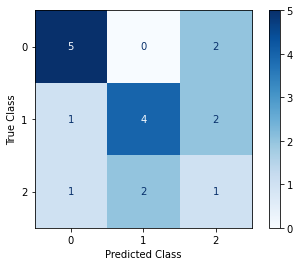

In [ ]:
# Aplicação de k-Nearest Neighbors
# Uso dos dados de vinho apresentados

from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(3, weights = 'uniform')
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)


classification_metrics(clf, X_test, y_test, cmap='Blues')

Modelo: DecisionTreeClassifier 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.88      1.00      0.93         7
           2       1.00      0.75      0.86         4

    accuracy                           0.94        18
   macro avg       0.96      0.92      0.93        18
weighted avg       0.95      0.94      0.94        18



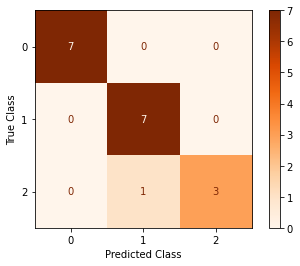

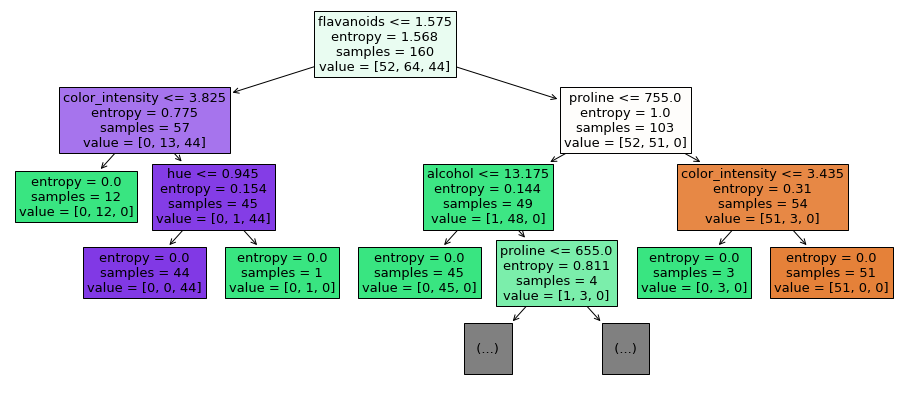

In [ ]:
# implementaçção de árvore de decisão

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train);
classification_metrics(dt, X_test, y_test, 'Oranges')

plt.figure(figsize = (16, 7))
plot_tree(dt, max_depth = 3, fontsize = 13, filled=True, feature_names=X_train.columns);
plt.show()

Modelo: RandomForestClassifier 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



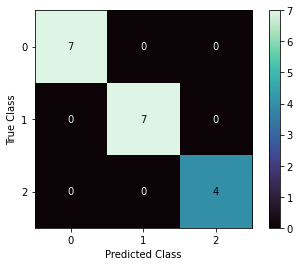

In [ ]:
# Implementação do calssificado de floresta aleatória

from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(criterion='entropy', random_state=0, n_jobs=-1)
rand_forest.fit(X_train, y_train)
classification_metrics(rand_forest, X_test, y_test, 'mako')

Modelo: GaussianNB 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



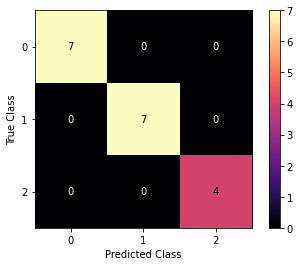

In [ ]:
# Implementação do classificador Naïve-Bayes, 
# assumindo que os dados de entrada 
# obedecem uma distribuição normal

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
classification_metrics(gnb, X_test, y_test, 'magma')